# Introduction 


## Libraries and more 

In [77]:
!pip install plotnine
!conda install -c conda-forge --yes plotnine

Solving environment: ...working... done

# All requested packages already installed.



In [78]:
import pandas as pd
import numpy as np
from scipy.stats import norm, kde
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("seaborn")

from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point, geom_bar, geom_boxplot, geom_hline, facet_grid, labs, geom_point, geom_col, stat_count, geom_histogram, stat_density, coord_flip
from plotnine import scale_x_continuous, scale_y_continuous, scale_colour_discrete, scale_x_reverse, scale_y_reverse, scale_color_manual, scale_color_brewer, scale_x_discrete, scale_fill_manual
from plotnine import theme_xkcd, theme_classic, theme_light, theme, element_blank
from plotnine import geom_text, position_stack

from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns

import plotly
import plotly.graph_objects as go
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# # Data 

In [79]:
# Lee archivo
url1 = "https://raw.githubusercontent.com/FoxuF/DataDataData/main/MetaCriticScrap/Video_Games_Sales_as_at_22_Dec_2016.csv"
url2 = "https://raw.githubusercontent.com/FoxuF/DataDataData/main/MetaCriticScrap/games-data.csv"
url3 = "https://raw.githubusercontent.com/FoxuF/DataDataData/main/MetaCriticScrap/steam.csv"
dfSales = pd.read_csv(url1)
dfGD = pd.read_csv(url2)
df = pd.read_csv(url3)

In [80]:
#Predict Na_Sales
dfSales.columns = ["Name","Platform", "Year","Genre",
              "Publisher", "NA_Sales","EU_Sales",
              "JP_Sales","Other_Sales","Global_Sales",
              "Critic_Score","Critic_Count","User_Score",
              "User_Count", "Developer", "Rating"]
dfSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16717 non-null  object 
 1   Platform      16719 non-null  object 
 2   Year          16450 non-null  float64
 3   Genre         16717 non-null  object 
 4   Publisher     16665 non-null  object 
 5   NA_Sales      16719 non-null  float64
 6   EU_Sales      16719 non-null  float64
 7   JP_Sales      16719 non-null  float64
 8   Other_Sales   16719 non-null  float64
 9   Global_Sales  16719 non-null  float64
 10  Critic_Score  8137 non-null   float64
 11  Critic_Count  8137 non-null   float64
 12  User_Score    10015 non-null  object 
 13  User_Count    7590 non-null   float64
 14  Developer     10096 non-null  object 
 15  Rating        9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [81]:
#User_Score
dfGD.columns = ["Name", "Platform","R_Date",
              "Critic_Score", "User_Score","Developer",
              "Genre","No_Players","Critic_Count",
              "User_Count"]
dfGD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17944 entries, 0 to 17943
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          17944 non-null  object
 1   Platform      17944 non-null  object
 2   R_Date        17944 non-null  object
 3   Critic_Score  17944 non-null  int64 
 4   User_Score    17944 non-null  object
 5   Developer     17944 non-null  object
 6   Genre         17944 non-null  object
 7   No_Players    17922 non-null  object
 8   Critic_Count  17944 non-null  int64 
 9   User_Count    17944 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.4+ MB


In [82]:
#DataFrame For recommended
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

# # Raw Data 

In [83]:
#:) Vemos los datos crudos sin limpiar
dfGDRaw = dfGD.head(100)
dfGDRaw

,Name,Platform,R_Date,Critic_Score,User_Score,Developer,Genre,No_Players,Critic_Count,User_Count
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.5,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364
...,...,...,...,...,...,...,...,...,...,...
95,Metal Gear Solid,PlayStation,"October 21, 1998",94,9.2,KCEJ,"Action Adventure,Modern",1 Player,20,1584
96,Grim Fandango,PC,"October 14, 1998",94,9.1,LucasArts,"Adventure,General,General,3D,Third-Person,Fantasy",No Online Multiplayer,15,685
97,Tom Clancy's Splinter Cell Chaos Theory,Xbox,"March 28, 2005",94,9.0,UbisoftMontreal,"Action Adventure,Modern",4 Online,70,218
98,Burnout 3: Takedown,Xbox,"September 7, 2004",94,7.7,CriterionGames,"Driving,Racing,Arcade",8 Online,76,182


In [ ]:
# Calcula matriz de correlación
corr_matrix_Sales = dfSales.corr()


In [ ]:
corr_matrix_Sales

In [ ]:
#Creamos nuestro canvas :) Bob Ross here i go 
ggplot(dfGDRaw)
ggplot(dfGDRaw) + aes(x="Critic_Score", y="User_Score")
ggplot(dfGDRaw) + aes(x="Critic_Score", y="User_Score",color="Genre") + geom_point()

In [ ]:
(
    ggplot(dfGDRaw)
    + aes(x="Critic_Score", y="User_Score")
    + geom_point()
    + facet_grid(facets="No_Players~R_Date")
)

In [ ]:
ggplot(dfGDRaw) + aes(x="Genre") + geom_bar() + coord_flip()

In [ ]:
ggplot(dfGDRaw) + aes(x="Developer") + geom_bar() + coord_flip()

In [ ]:
ggplot(dfGDRaw) + aes(x="User_Score") + stat_density(color="#668cff", fill="#668cff")

In [ ]:
# Grafica histograma para cada variable continua
dfSales.hist(bins=50, figsize=(20,16))

In [ ]:
dfGDRaw.hist(bins=50, figsize=(15,10))

## Cleaning the data 

### Dataset 1 dfSales Cleaning

In [84]:
dfSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16717 non-null  object 
 1   Platform      16719 non-null  object 
 2   Year          16450 non-null  float64
 3   Genre         16717 non-null  object 
 4   Publisher     16665 non-null  object 
 5   NA_Sales      16719 non-null  float64
 6   EU_Sales      16719 non-null  float64
 7   JP_Sales      16719 non-null  float64
 8   Other_Sales   16719 non-null  float64
 9   Global_Sales  16719 non-null  float64
 10  Critic_Score  8137 non-null   float64
 11  Critic_Count  8137 non-null   float64
 12  User_Score    10015 non-null  object 
 13  User_Count    7590 non-null   float64
 14  Developer     10096 non-null  object 
 15  Rating        9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [85]:
dfSales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
#Pasamos el tipo de Rating a numerico :D
dfSales['Rating'] = pd.to_numeric(dfSales['Rating'],errors='coerce')

In [87]:
#Checamos si hay nulos y cuantos tenemos para saber que limpiar o que hacer con ellos
dfSales.isna().sum()

Name                2
Platform            0
Year              269
Genre               2
Publisher          54
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Critic_Score     8582
Critic_Count     8582
User_Score       6704
User_Count       9129
Developer        6623
Rating          16719
dtype: int64

In [88]:
#dropeamos cosas que no nos sirven y solo nos quedamos con un dataset numerico para el modelo :D
dfSales = dfSales.drop(columns=['Critic_Score'])
dfSales = dfSales.drop(columns=['Critic_Count'])
dfSales = dfSales.drop(columns=['User_Score'])
dfSales = dfSales.drop(columns=['User_Count'])
dfSales = dfSales.drop(columns=['Rating'])
dfSales = dfSales.drop(columns=['Publisher'])
dfSales = dfSales.drop(columns=['Developer'])
dfSales = dfSales.drop(columns=['Year'])
dfSales = dfSales.drop(columns=['Name'])
dfSales = dfSales.dropna(how='any')
dfSales

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,Sports,41.36,28.96,3.77,8.45,82.53
1,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Wii,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii,Sports,15.61,10.93,3.28,2.95,32.77
4,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...
16714,PS3,Action,0.00,0.00,0.01,0.00,0.01
16715,X360,Sports,0.00,0.01,0.00,0.00,0.01
16716,PSV,Adventure,0.00,0.00,0.01,0.00,0.01
16717,GBA,Platform,0.01,0.00,0.00,0.00,0.01


In [89]:
#Vemos los valores a convertir en numericos
dfSales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [90]:
#Los convertimos a numericos 
Platform_Num = {"Platform":  {'Wii':1, 'NES':2, 'GB':3, 'DS':4, 'X360':5, 'PS3':6, 'PS2':7, 'SNES':8, 'GBA':9,
       'PS4':10, '3DS':11, 'N64':12, 'PS':13, 'XB':14, 'PC':15, '2600':16, 'PSP':17, 'XOne':18,
       'WiiU':19, 'GC':20, 'GEN':21, 'DC':22, 'PSV':23, 'SAT':24, 'SCD':25, 'WS':26, 'NG':27, 'TG16':28,
       '3DO':29, 'GG':30, 'PCFX':31}}
dfSales.replace(Platform_Num, inplace=True)
dfSales

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Sports,41.36,28.96,3.77,8.45,82.53
1,2,Platform,29.08,3.58,6.81,0.77,40.24
2,1,Racing,15.68,12.76,3.79,3.29,35.52
3,1,Sports,15.61,10.93,3.28,2.95,32.77
4,3,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...
16714,6,Action,0.00,0.00,0.01,0.00,0.01
16715,5,Sports,0.00,0.01,0.00,0.00,0.01
16716,23,Adventure,0.00,0.00,0.01,0.00,0.01
16717,9,Platform,0.01,0.00,0.00,0.00,0.01


In [91]:
dfSales['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [92]:
Genre_Num = {"Genre":  {'Sports':1, 'Platform':2, 'Racing':3, 'Role-Playing':4, 'Puzzle':5, 'Misc':6,
       'Shooter':7, 'Simulation':8, 'Action':9, 'Fighting':10, 'Adventure':11,
       'Strategy':12}}
dfSales.replace(Genre_Num, inplace=True)
dfSales

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,1,41.36,28.96,3.77,8.45,82.53
1,2,2,29.08,3.58,6.81,0.77,40.24
2,1,3,15.68,12.76,3.79,3.29,35.52
3,1,1,15.61,10.93,3.28,2.95,32.77
4,3,4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...
16714,6,9,0.00,0.00,0.01,0.00,0.01
16715,5,1,0.00,0.01,0.00,0.00,0.01
16716,23,11,0.00,0.00,0.01,0.00,0.01
16717,9,2,0.01,0.00,0.00,0.00,0.01


### Dataset 2 dfGD Cleaning :) i want to die

In [93]:
dfGD['User_Score'] = pd.to_numeric(dfGD['User_Score'],errors='coerce')
dfGD['Critic_Score'] = pd.to_numeric(dfGD['Critic_Score'],errors='coerce')
dfGD['Critic_Score'] = dfGD['Critic_Score']/10

In [94]:
dfGD = dfGD.drop(columns=['R_Date'])
dfGD = dfGD.drop(columns=['Developer'])
dfGD = dfGD.drop(columns=['No_Players'])

In [95]:
dfGD.isna().sum()

Name               0
Platform           0
Critic_Score       0
User_Score      1286
Genre              0
Critic_Count       0
User_Count         0
dtype: int64

In [96]:
#Eliminamos registros nulos para no afectar el score de juegos con score 0. 
dfGD.dropna(subset = ["User_Score"], inplace=True)
dfGD = dfGD.dropna(how='any')
dfGD

,Name,Platform,Critic_Score,User_Score,Genre,Critic_Count,User_Count
0,The Legend of Zelda: Ocarina of Time,Nintendo64,9.9,9.1,"Action Adventure,Fantasy",22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,9.8,7.4,"Sports,Alternative,Skateboarding",19,647
2,Grand Theft Auto IV,PlayStation3,9.8,7.6,"Action Adventure,Modern,Modern,Open-World",64,3806
3,SoulCalibur,Dreamcast,9.8,8.5,"Action,Fighting,3D",24,324
4,Grand Theft Auto IV,Xbox360,9.8,7.9,"Action Adventure,Modern,Modern,Open-World",86,3364
...,...,...,...,...,...,...,...
17939,Vroom in the Night Sky,Switch,1.7,3.1,"Sports,Individual,Biking",15,105
17940,Leisure Suit Larry: Box Office Bust,PlayStation3,1.7,1.9,"Action Adventure,Adventure,Third-Person,Open-W...",11,45
17941,Yaris,Xbox360,1.7,4.3,"Driving,Racing,Arcade,Arcade,Automobile",7,129
17942,Ride to Hell: Retribution,PC,1.6,1.3,"Driving,Modern,Racing,Motorcycle,Motocross,Mod...",9,581


In [97]:
dfGD.isna().sum()

Name            0
Platform        0
Critic_Score    0
User_Score      0
Genre           0
Critic_Count    0
User_Count      0
dtype: int64

In [98]:
dfGD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16658 entries, 0 to 17943
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16658 non-null  object 
 1   Platform      16658 non-null  object 
 2   Critic_Score  16658 non-null  float64
 3   User_Score    16658 non-null  float64
 4   Genre         16658 non-null  object 
 5   Critic_Count  16658 non-null  int64  
 6   User_Count    16658 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.0+ MB


In [99]:
dfGD['Platform'].unique()

array(['Nintendo64', 'PlayStation', 'PlayStation3', 'Dreamcast',
       'Xbox360', 'Wii', 'XboxOne', 'Switch', 'PlayStation2',
       'PlayStation4', 'GameCube', 'Xbox', 'PC', 'WiiU', 'GameBoyAdvance',
       '3DS', 'DS', 'PlayStationVita', 'PSP', 'Stadia'], dtype=object)

In [100]:
#Platform_Num = {"Platform":  {'Wii':1, 'NES':2, 'GB':3, 'DS':4, 'X360':5, 'PS3':6, 'PS2':7, 'SNES':8, 'GBA':9,
#       'PS4':10, '3DS':11, 'N64':12, 'PS':13, 'XB':14, 'PC':15, '2600':16, 'PSP':17, 'XOne':18,
#       'WiiU':19, 'GC':20, 'GEN':21, 'DC':22, 'PSV':23, 'SAT':24, 'SCD':25, 'WS':26, 'NG':27, 'TG16':28,
#       '3DO':29, 'GG':30, 'PCFX':31}}
Platform_Num = {"Platform":  {'Nintendo64':12, 'PlayStation':13, 'PlayStation3':6, 'Dreamcast':22,
       'Xbox360':5, 'Wii':1, 'XboxOne':18, 'Switch':32, 'PlayStation2':7,
       'PlayStation4':10, 'GameCube':20, 'Xbox':14, 'PC':15, 'WiiU':19, 'GameBoyAdvance':9,
       '3DS':11, 'DS':4, 'PlayStationVita':23, 'PSP':17, 'XboxSeriesX':33,
       'PlayStation5':34, 'Stadia':35}}
dfGD.replace(Platform_Num, inplace=True)
dfGD

,Name,Platform,Critic_Score,User_Score,Genre,Critic_Count,User_Count
0,The Legend of Zelda: Ocarina of Time,12,9.9,9.1,"Action Adventure,Fantasy",22,5749
1,Tony Hawk's Pro Skater 2,13,9.8,7.4,"Sports,Alternative,Skateboarding",19,647
2,Grand Theft Auto IV,6,9.8,7.6,"Action Adventure,Modern,Modern,Open-World",64,3806
3,SoulCalibur,22,9.8,8.5,"Action,Fighting,3D",24,324
4,Grand Theft Auto IV,5,9.8,7.9,"Action Adventure,Modern,Modern,Open-World",86,3364
...,...,...,...,...,...,...,...
17939,Vroom in the Night Sky,32,1.7,3.1,"Sports,Individual,Biking",15,105
17940,Leisure Suit Larry: Box Office Bust,6,1.7,1.9,"Action Adventure,Adventure,Third-Person,Open-W...",11,45
17941,Yaris,5,1.7,4.3,"Driving,Racing,Arcade,Arcade,Automobile",7,129
17942,Ride to Hell: Retribution,15,1.6,1.3,"Driving,Modern,Racing,Motorcycle,Motocross,Mod...",9,581


In [101]:
dfGD['Genre'].describe()

count                    16658
unique                    1982
top       Action,Platformer,2D
freq                       483
Name: Genre, dtype: object

In [102]:
Spy_Tags = dfGD['Genre'].unique()
Spy_Tags

array(['Action Adventure,Fantasy', 'Sports,Alternative,Skateboarding',
       'Action Adventure,Modern,Modern,Open-World', ...,
       'Massively Multiplayer Online,Modern,Role-Playing,Massively Multiplayer',
       'Driving,Action Adventure,Modern,Racing,General,Modern,Motorcycle,Motocross',
       'Driving,Modern,Racing,Motorcycle,Motocross,Modern,Action Adventure,General'],
      dtype=object)

In [103]:
top_10_genres = dfGD['Genre'].apply(lambda x: x.split(',')[0]).value_counts()
top_10_genres

Action                   5632
Action Adventure         2148
Role-Playing             1676
Sports                   1409
Strategy                 1360
                         ... 
Street                      1
Breeding/Constructing       1
Turn-Based                  1
Dancing                     1
Tactical                    1
Name: Genre, Length: 63, dtype: int64

In [104]:
dfGD['Genre'] = pd.factorize(dfGD.Genre)[0]
dfGD = dfGD.drop(columns=['Name'])
dfGD['Genre'] = dfGD['Genre'].astype("category")
dfGD

,Platform,Critic_Score,User_Score,Genre,Critic_Count,User_Count
0,12,9.9,9.1,0,22,5749
1,13,9.8,7.4,1,19,647
2,6,9.8,7.6,2,64,3806
3,22,9.8,8.5,3,24,324
4,5,9.8,7.9,2,86,3364
...,...,...,...,...,...,...
17939,32,1.7,3.1,452,15,105
17940,6,1.7,1.9,1845,11,45
17941,5,1.7,4.3,193,7,129
17942,15,1.6,1.3,1981,9,581


## Data clean! :) lets see it 

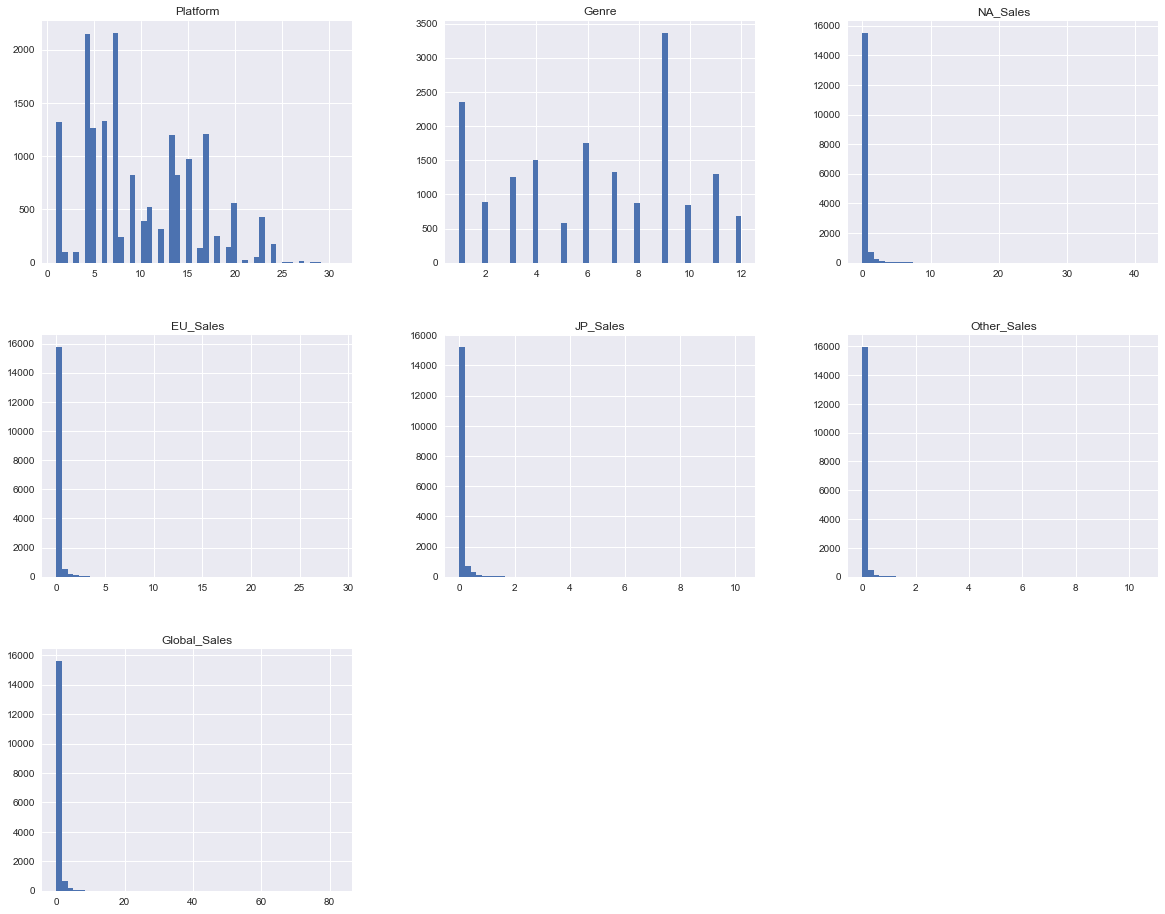

In [105]:
fig = dfSales.hist(bins=50, figsize=(20,16))

## Model 1 

In [106]:
dfGDShort = dfGD
dfGDShort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16658 entries, 0 to 17943
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Platform      16658 non-null  int64   
 1   Critic_Score  16658 non-null  float64 
 2   User_Score    16658 non-null  float64 
 3   Genre         16658 non-null  category
 4   Critic_Count  16658 non-null  int64   
 5   User_Count    16658 non-null  int64   
dtypes: category(1), float64(2), int64(3)
memory usage: 893.4 KB


In [107]:
dfGDShort.isna().sum()

Platform        0
Critic_Score    0
User_Score      0
Genre           0
Critic_Count    0
User_Count      0
dtype: int64

In [108]:
dfGDShort['User_Score'] = dfGDShort['User_Score'].fillna(0)

In [109]:
dfGDShort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16658 entries, 0 to 17943
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Platform      16658 non-null  int64   
 1   Critic_Score  16658 non-null  float64 
 2   User_Score    16658 non-null  float64 
 3   Genre         16658 non-null  category
 4   Critic_Count  16658 non-null  int64   
 5   User_Count    16658 non-null  int64   
dtypes: category(1), float64(2), int64(3)
memory usage: 893.4 KB


In [110]:
dfGDShort.isna().sum()

Platform        0
Critic_Score    0
User_Score      0
Genre           0
Critic_Count    0
User_Count      0
dtype: int64

In [111]:
def my_train_test_split(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [112]:
train_set, test_set = my_train_test_split(dfGDShort, 0.2)

In [113]:
train_set, test_set = train_test_split(dfGDShort, test_size=0.2, random_state=42)

In [114]:

#dfGDShort["try1"] = pd.cut(dfGDShort["Critic_Count"],
#                                 bins=[10, 30, 50, 70, 90, np.inf],
#                                 labels=[1, 2, 3, 4, 5])
dfGDShort["Prediction"] = pd.cut(dfGDShort["User_Score"],
#                                 bins=[8.0, 8.5, 9, 9.5, 9.9, np.inf],
                                 bins=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0, 9.0, 9.9, np.inf],
#                                 bins=[10, 30, 50, 70, 90, np.inf],
                                 labels=[1, 2, 3, 4, 5,6,7,8,9,10,11])

In [115]:
dfGDShort.isna().sum()

Platform        0
Critic_Score    0
User_Score      0
Genre           0
Critic_Count    0
User_Count      0
Prediction      0
dtype: int64

In [116]:
dfGDShort["Prediction"] 

0        10
1         8
2         8
3         9
4         8
         ..
17939     4
17940     2
17941     5
17942     2
17943     2
Name: Prediction, Length: 16658, dtype: category
Categories (11, int64): [1 < 2 < 3 < 4 ... 8 < 9 < 10 < 11]

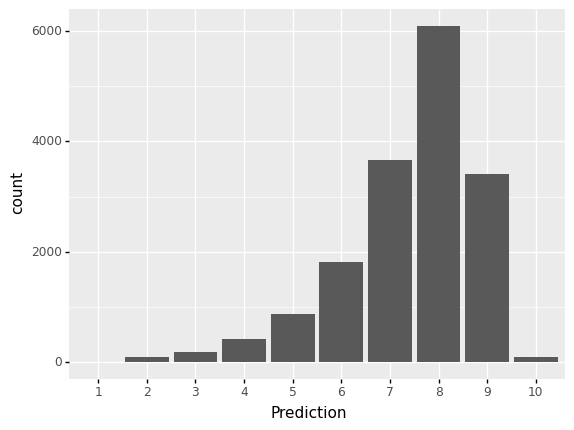

<ggplot: (151294897128)>

In [117]:
ggplot(dfGDShort) + aes(x="Prediction") + geom_bar(stat="count")

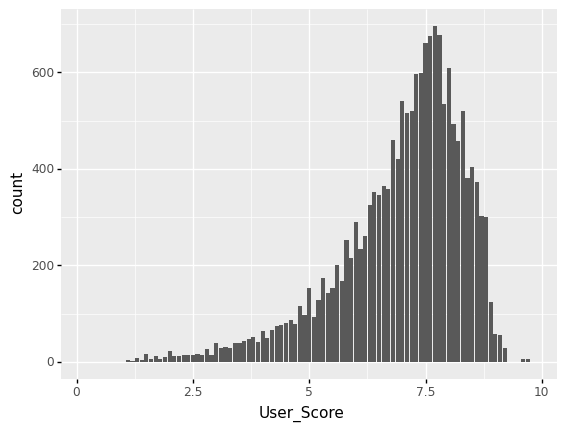

<ggplot: (151295005609)>

In [118]:
ggplot(dfGDShort) + aes(x="User_Score") + geom_bar(stat="count")

In [119]:
# Devuelve la distribución de nivel en todo el conjunto de datos
dfGDShort["Prediction"].value_counts()/len(dfGDShort)

8     0.365170
7     0.220014
9     0.204887
6     0.109137
5     0.052888
4     0.024913
3     0.010806
10    0.006003
2     0.005763
1     0.000420
11    0.000000
Name: Prediction, dtype: float64

In [120]:
dfGDShort

,Platform,Critic_Score,User_Score,Genre,Critic_Count,User_Count,Prediction
0,12,9.9,9.1,0,22,5749,10
1,13,9.8,7.4,1,19,647,8
2,6,9.8,7.6,2,64,3806,8
3,22,9.8,8.5,3,24,324,9
4,5,9.8,7.9,2,86,3364,8
...,...,...,...,...,...,...,...
17939,32,1.7,3.1,452,15,105,4
17940,6,1.7,1.9,1845,11,45,2
17941,5,1.7,4.3,193,7,129,5
17942,15,1.6,1.3,1981,9,581,2


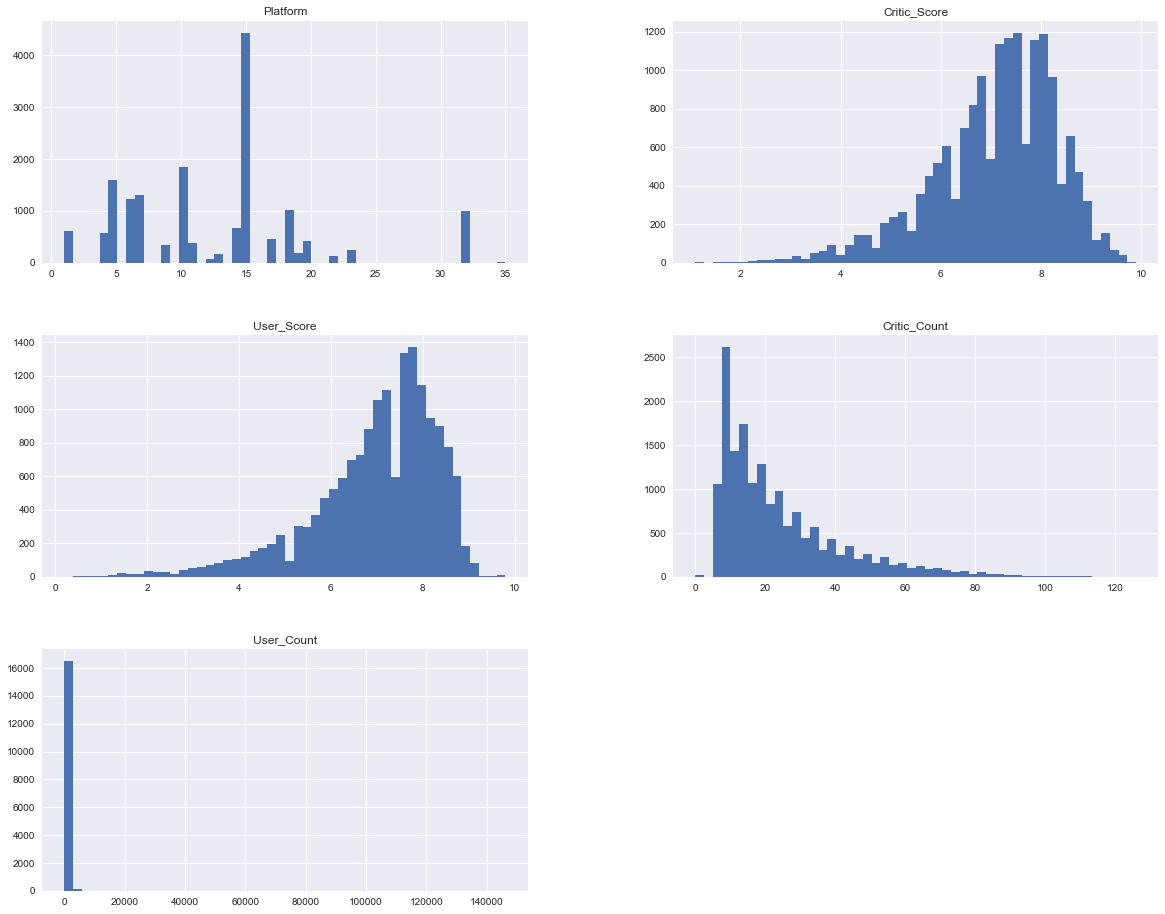

In [121]:
fig = dfGDShort.hist(bins=50, figsize=(20,16))

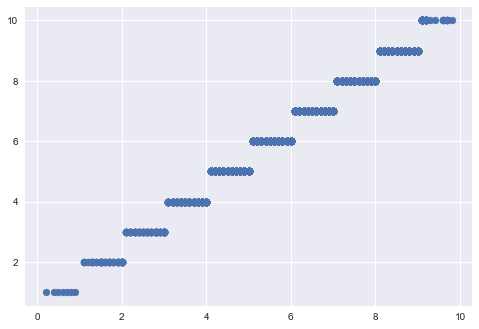

In [122]:
plt.scatter(dfGDShort['User_Score'], dfGDShort['Prediction'])
plt.show() 

## Model 2 


In [123]:
dfSales_entrenamiento = dfSales.sample(frac=0.8,random_state=0)
dfSales_test = dfSales.drop(dfSales_entrenamiento.index)

In [124]:
dfSales_entrenamiento

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7942,9,9,0.13,0.05,0.00,0.00,0.19
4712,7,4,0.20,0.16,0.00,0.05,0.41
6172,7,4,0.14,0.11,0.00,0.04,0.28
767,10,7,0.81,0.85,0.15,0.33,2.14
1964,4,7,0.95,0.01,0.01,0.08,1.05
...,...,...,...,...,...,...,...
4715,13,8,0.00,0.00,0.38,0.03,0.41
11027,17,11,0.08,0.00,0.00,0.01,0.09
9503,4,11,0.12,0.00,0.00,0.01,0.13
4794,1,6,0.35,0.02,0.00,0.03,0.40


In [125]:
dfSales_test

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,1,41.36,28.96,3.77,8.45,82.53
13,1,1,8.92,8.03,3.60,2.15,22.70
21,3,2,10.83,2.71,4.18,0.42,18.14
26,4,5,3.43,5.35,5.32,1.18,15.29
27,4,4,5.51,3.17,5.65,0.80,15.14
...,...,...,...,...,...,...,...
16688,23,11,0.00,0.00,0.01,0.00,0.01
16692,11,1,0.01,0.00,0.00,0.00,0.01
16696,15,9,0.00,0.01,0.00,0.00,0.01
16705,17,4,0.00,0.00,0.01,0.00,0.01


In [126]:
Sales_etiquetas_entrenamiento = dfSales_entrenamiento.pop('NA_Sales')
Sales_etiquetas_test = dfSales_test.pop('NA_Sales')

In [127]:
Sales_etiquetas_entrenamiento

7942     0.13
4712     0.20
6172     0.14
767      0.81
1964     0.95
         ... 
4715     0.00
11027    0.08
9503     0.12
4794     0.35
2118     0.62
Name: NA_Sales, Length: 13374, dtype: float64

In [128]:
Sales_etiquetas_test

0        41.36
13        8.92
21       10.83
26        3.43
27        5.51
         ...  
16688     0.00
16692     0.01
16696     0.00
16705     0.00
16716     0.00
Name: NA_Sales, Length: 3343, dtype: float64

In [129]:
dfSales_entrenamiento

,Platform,Genre,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7942,9,9,0.05,0.00,0.00,0.19
4712,7,4,0.16,0.00,0.05,0.41
6172,7,4,0.11,0.00,0.04,0.28
767,10,7,0.85,0.15,0.33,2.14
1964,4,7,0.01,0.01,0.08,1.05
...,...,...,...,...,...,...
4715,13,8,0.00,0.38,0.03,0.41
11027,17,11,0.00,0.00,0.01,0.09
9503,4,11,0.00,0.00,0.01,0.13
4794,1,6,0.02,0.00,0.03,0.40


In [130]:
from sklearn.linear_model import LinearRegression
modelo2 = LinearRegression()
modelo2.fit(dfSales_entrenamiento,Sales_etiquetas_entrenamiento)

LinearRegression()

In [131]:
predicciones = modelo2.predict(dfSales_test)
predicciones

array([ 4.13582984e+01,  8.92235546e+00,  1.08311068e+01, ...,
       -3.25459712e-04, -3.84310635e-04, -3.73374834e-04])

In [132]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(Sales_etiquetas_test, predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 0.526284


In [133]:
dfSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      16717 non-null  int64  
 1   Genre         16717 non-null  int64  
 2   NA_Sales      16717 non-null  float64
 3   EU_Sales      16717 non-null  float64
 4   JP_Sales      16717 non-null  float64
 5   Other_Sales   16717 non-null  float64
 6   Global_Sales  16717 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 1.5 MB


In [134]:
#nuevo_game = pd.DataFrame(np.array([[15,7,8,2,1]]),columns=['Platform', 'Genre', 'EU_Sales','JP_Sales','Other_Sales'])
nuevo_game = pd.DataFrame(np.array([[15,7,8,2,1,25]]),columns=['Platform', 'Genre', 'EU_Sales','JP_Sales','Other_Sales','Global_Sales'])
nuevo_game

,Platform,Genre,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,15,7,8,2,1,25


In [135]:
#nuevo_game2 = pd.DataFrame(np.array([[15,9,8,2,1]]),columns=['Platform', 'Genre', 'EU_Sales','JP_Sales','Other_Sales'])
nuevo_game2 = pd.DataFrame(np.array([[15,7,5,6,0,30]]),columns=['Platform', 'Genre', 'EU_Sales','JP_Sales','Other_Sales','Global_Sales'])
nuevo_game2

,Platform,Genre,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,15,7,5,6,0,30


In [136]:
modelo2.predict(nuevo_game)

array([14.00170039])

In [137]:
modelo2.predict(nuevo_game2)

array([19.00163967])

In [138]:
###################

# # Recomender 

In [139]:
#Deleting the games that have less than 1000 positive ratings
df = df[df['positive_ratings'] > 1000]
df.head(27)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [140]:
df = df.reset_index(drop = True)
df.head(30)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [141]:
#List of important columns for recomendation
columns =['steamspy_tags','name']
#Show the columns
df[columns].head(30)

,steamspy_tags,name
0,Action;FPS;Multiplayer,Counter-Strike
1,Action;FPS;Multiplayer,Team Fortress Classic
2,FPS;World War II;Multiplayer,Day of Defeat
3,Action;FPS;Multiplayer,Deathmatch Classic
4,FPS;Action;Sci-fi,Half-Life: Opposing Force
5,Action;FPS;Multiplayer,Ricochet
6,FPS;Classic;Action,Half-Life
7,Action;FPS;Multiplayer,Counter-Strike: Condition Zero
8,FPS;Action;Sci-fi,Half-Life: Blue Shift
9,FPS;Action;Sci-fi,Half-Life 2


In [142]:
#Check for missing values
df[columns].isnull().values.any()

False

In [143]:
#Combine the values of the important columns into a single string
def get_important_features(data):
    important_features =[]
    for i in range(0,data.shape[0]):
        important_features.append(data['steamspy_tags'][i]+' '+data['name'][i])
        
    return important_features

In [144]:
#Create a column to hold the strings
df['important_features']=get_important_features(df)
df['Game_no'] = range(0,df.shape[0])
#Show the data
#df.head()
df['name'].head(100)

0                        Counter-Strike
1                 Team Fortress Classic
2                         Day of Defeat
3                    Deathmatch Classic
4             Half-Life: Opposing Force
                    ...                
95                           EVE Online
96                              RACE 07
97    Civilization IV: Beyond the Sword
98                    BioShock Infinite
99          Sid Meier's Civilization® V
Name: name, Length: 100, dtype: object

In [145]:
#Convert to matrix
cm = CountVectorizer().fit_transform(df['important_features'])
print(cm)

  (0, 75)	1
  (0, 1035)	1
  (0, 1655)	1
  (0, 568)	1
  (0, 2434)	1
  (1, 75)	1
  (1, 1035)	1
  (1, 1655)	1
  (1, 2518)	1
  (1, 1025)	1
  (1, 493)	1
  (2, 1035)	1
  (2, 1655)	1
  (2, 2840)	1
  (2, 2770)	1
  (2, 1297)	1
  (2, 653)	1
  (2, 1758)	1
  (2, 681)	1
  (3, 75)	1
  (3, 1035)	1
  (3, 1655)	1
  (3, 493)	1
  (3, 670)	1
  (4, 75)	1
  :	:
  (2209, 551)	1
  (2209, 1107)	1
  (2209, 2807)	1
  (2210, 1041)	1
  (2210, 2579)	1
  (2210, 1909)	1
  (2210, 1312)	1
  (2210, 2542)	1
  (2210, 1258)	1
  (2210, 644)	1
  (2210, 1969)	1
  (2210, 2809)	1
  (2210, 525)	1
  (2211, 1041)	1
  (2211, 2579)	1
  (2211, 1909)	1
  (2211, 1618)	1
  (2211, 819)	1
  (2211, 70)	1
  (2211, 2703)	1
  (2212, 2429)	1
  (2212, 1312)	1
  (2212, 485)	1
  (2212, 388)	1
  (2212, 1345)	1


In [146]:
#Get the cosine similarity matrix from cm
cs = cosine_similarity(cm)
cs

array([[1.        , 0.54772256, 0.31622777, ..., 0.        , 0.        ,
        0.        ],
       [0.54772256, 1.        , 0.28867513, ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.28867513, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.35856858,
        0.14142136],
       [0.        , 0.        , 0.        , ..., 0.35856858, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.14142136, 0.        ,
        1.        ]])

In [147]:
#Get the shape of the cs matrix
cs.shape

(2213, 2213)

In [148]:
#Get the title the user likes
#title = 'Counter-Strike'
#title = 'Team Fortress 2'
#title = 'Mass Effect 2'
#title = 'Battlefield: Bad Company™ 2'
#title = 'BioShock Infinite'
#title = 'Hollow Knight'
title = 'Portal'
#Find the appid
app_id = df[df.name == title]['Game_no'].values[0]
print(app_id)

17


In [149]:
#Create a list of similarity score
scores = list(enumerate(cs[app_id]))
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.1690308509457033),
 (15, 0.0),
 (16, 0.0),
 (17, 0.9999999999999999),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.7302967433402215),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.2981423969999719),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.19999999999999998),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.19999999999999998),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 

In [150]:
#Sort the list
sorted_scores = sorted(scores,key = lambda x:x[1],reverse = True)
sorted_scores = sorted_scores[1:]
sorted_scores

[(23, 0.7302967433402215),
 (487, 0.6),
 (1092, 0.6),
 (364, 0.5477225575051662),
 (433, 0.5477225575051662),
 (648, 0.5477225575051662),
 (1792, 0.5477225575051662),
 (1740, 0.50709255283711),
 (782, 0.47434164902525683),
 (1988, 0.44721359549995787),
 (395, 0.39999999999999997),
 (635, 0.39999999999999997),
 (672, 0.39999999999999997),
 (1385, 0.39999999999999997),
 (1469, 0.39999999999999997),
 (1489, 0.39999999999999997),
 (149, 0.36514837167011077),
 (175, 0.36514837167011077),
 (437, 0.36514837167011077),
 (2061, 0.36514837167011077),
 (1569, 0.3380617018914066),
 (1848, 0.3380617018914066),
 (208, 0.3162277660168379),
 (296, 0.3162277660168379),
 (646, 0.3162277660168379),
 (898, 0.3162277660168379),
 (998, 0.3162277660168379),
 (1884, 0.3162277660168379),
 (32, 0.2981423969999719),
 (174, 0.2981423969999719),
 (1655, 0.2981423969999719),
 (1979, 0.2981423969999719),
 (600, 0.282842712474619),
 (749, 0.282842712474619),
 (205, 0.22360679774997896),
 (236, 0.22360679774997896),
 

In [151]:
df['positive_ratings'] = df['positive_ratings'].astype(str)

In [152]:
#Print the first 10 recomended game
j = 0
print ('10 recomended game for',title,'are:\n')
for item in sorted_scores:
    game_title = (df[df.Game_no == item[0]]['name'].values[0]+' (Postitive Ratings : ' + df[df.Game_no == item[0]]['positive_ratings'].values[0] + ')')
    print(j+1,game_title)
    print('Similarity : ',end='')
    print(item[1])
    j = j+1
    if j>9 :
        break

10 recomended game for Portal are:

1 Portal 2 (Postitive Ratings : 138220)
Similarity : 0.7302967433402215
2 Antichamber (Postitive Ratings : 12232)
Similarity : 0.6
3 Polarity (Postitive Ratings : 3932)
Similarity : 0.6
4 Quantum Conundrum (Postitive Ratings : 1224)
Similarity : 0.5477225575051662
5 The Witness (Postitive Ratings : 6572)
Similarity : 0.5477225575051662
6 Q.U.B.E: Director's Cut (Postitive Ratings : 1194)
Similarity : 0.5477225575051662
7 Hello Neighbor (Postitive Ratings : 1531)
Similarity : 0.5477225575051662
8 The Turing Test (Postitive Ratings : 3012)
Similarity : 0.50709255283711
9 The Talos Principle (Postitive Ratings : 17237)
Similarity : 0.47434164902525683
10 Bendy and the Ink Machine™ (Postitive Ratings : 9901)
Similarity : 0.44721359549995787
